# Lab 8: matrix equations and linear least-squares fitting

## Matrix operations

We begin today’s lab with a quick investigation of how to use numpy `array`s to represent matrices. We can use the `array` *constructor* function to make a matrix:

In [1]:
import numpy as np

from pylab import figure, logspace, loglog, xlabel, ylabel, title, legend, plot, grid

% matplotlib notebook

In [2]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[2,0,0],[0,1,0],[0,0,1]])
print(A)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[2 0 0]
 [0 1 0]
 [0 0 1]]


It is tempting to multiply the matrices by using `*`, but if we try:

In [3]:
print(A*B) # Each element of A was multiplied by the corresponding element of B

[[2 0 0]
 [0 5 0]
 [0 0 9]]


**Can you explain what has happened?** 

The correct way is to use the `dot` function, or to use the shorthand `@`:

In [4]:
print(A@B)

[[ 2  2  3]
 [ 8  5  6]
 [14  8  9]]


In [5]:
print(np.dot(A,B))

[[ 2  2  3]
 [ 8  5  6]
 [14  8  9]]


Numpy is clever enough to interpret a one-dimensional array as either a row or a column matrix depending on the context:

In [6]:
v = np.array([1,0,0])
print(A@v)
print(v@A)

[1 4 7]
[1 2 3]


Many useful matrix manipulation tools are in the `linalg` namespace. Among these, we can find the inverse of a matrix with `inv`:

In [7]:
np.linalg.inv(B)

array([[ 0.5,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ]])

In [8]:
#quiz:

matrix = np.array([[-2,0,1],[0,3,-2],[1,-2,1]])
np.linalg.inv(matrix)

array([[ 1.,  2.,  3.],
       [ 2.,  3.,  4.],
       [ 3.,  4.,  6.]])

(Note as always that we can `import` functions directly into the main namespace if this is too much typing, by evaluating `from numpy.linalg import inv` or whatever.)

Let’s put this to use by solving a matrix equation. Specifically, let’s solve the simultaneous equations
$$\begin{align*}
2x + 3y &= 16 \\
7x - 2y &= 31 \\
\end{align*}
$$
or, equivalently,
$$
\begin{pmatrix}2 & 3 \\ 7 & -2\end{pmatrix}
\begin{pmatrix}x \\y \end{pmatrix} =
\begin{pmatrix}16 \\ 31\end{pmatrix}.
$$

The obvious way is to use the matrix inverse:
$$
\begin{pmatrix}x \\y \end{pmatrix} =
\begin{pmatrix}2 & 3 \\ 7 & -2\end{pmatrix}^{-1}
\begin{pmatrix}16 \\ 31\end{pmatrix}.
$$
**Use the matrix commands we’ve just learned to evaluate the RHS of this equation.**

In [9]:
M = np.array([[2,3],[7,-2]])
v = np.array([16,31])
np.linalg.inv(M)@v

array([ 5.,  2.])

Another option is to use the `linalg.solve` function, which exists specifically to solve matrix equations of the form $\mathbf{Ax} = \mathbf{b}$. It takes two arguments, the matrix $\mathbf{A}$ and the vector $\mathbf{b}$. **Check that you get the same answer using this method:**

In [10]:
# Define suitable A and b here
np.linalg.solve(M, v)

array([ 5.,  2.])

Let’s compare the performance of these two commands on larger matrices. To generate a big matrix easily, we use the `rand` function, which lives in the `random` namespace in `numpy`. Calling `np.random.rand(20)` will return an `array` of 20 random numbers between 0 and 1, and similarly `np.random.rand(100,100)` will return a $100\times 100$ `array`.

Use the `%timeit` “magic” command to **compare the speeds of these two methods for matrices of suitable sizes**: you should be able to get up to at least $1000\times 1000$.

(*Hint*: The easiest way to use this is just to put `%timeit` before the command you want to time.)

**Extension**: A more sophisticated method is to write something like

    mytime = %timeit -o some_command()

which will store a range of information about the timing in the variable `mytime`. The time taken for each of several runs will be stored as `mytime.all_runs`. Use this information to **calculate the average time taken, and plot this against matrix size on a log-log graph.**

In [11]:
Mp = np.random.rand(1000,1000)
vp = np.random.rand(1000)

In [12]:
%timeit np.linalg.solve(Mp,vp)

The slowest run took 7.10 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 13.7 ms per loop


In [13]:
%timeit  np.linalg.inv(Mp)@vp

10 loops, best of 3: 57.2 ms per loop


In [14]:
myruns=[]
npruns=[]
for i in range(100,1501,100):
    Mp = np.random.rand(i,i)
    vp = np.random.rand(i)
    nptime = %timeit -o np.linalg.solve(Mp,vp)
    npruns.append(np.mean(nptime.all_runs))
    mytime = %timeit -o np.linalg.inv(Mp)@vp
    myruns.append(np.mean(mytime.all_runs))
myruns=np.array(myruns)
noruns=np.array(npruns)

The slowest run took 14.48 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 102 µs per loop
10000 loops, best of 3: 163 µs per loop
1000 loops, best of 3: 249 µs per loop
1000 loops, best of 3: 615 µs per loop
1000 loops, best of 3: 469 µs per loop
100 loops, best of 3: 2.07 ms per loop
1000 loops, best of 3: 1.27 ms per loop
100 loops, best of 3: 4.57 ms per loop
100 loops, best of 3: 1.95 ms per loop
100 loops, best of 3: 7.84 ms per loop
100 loops, best of 3: 3 ms per loop
100 loops, best of 3: 12.5 ms per loop
100 loops, best of 3: 4.3 ms per loop
100 loops, best of 3: 18 ms per loop
100 loops, best of 3: 6.34 ms per loop
10 loops, best of 3: 28 ms per loop
100 loops, best of 3: 8.48 ms per loop
10 loops, best of 3: 35.9 ms per loop
100 loops, best of 3: 11.9 ms per loop
10 loops, best of 3: 50.1 ms per loop
10 loops, best of 3: 19.6 ms per loop
10 loops, best of 3: 71.8 ms per loop
10 loops, best of 3: 28.6 ms per 

<IPython.core.display.Javascript object>


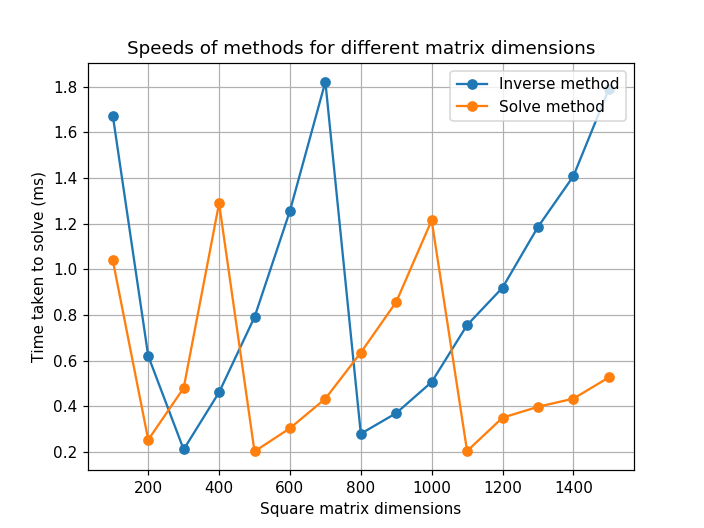

In [15]:
x1=np.linspace(100,1500,15)

figure()

plot(x1,myruns,"o-",label="Inverse method")
plot(x1,npruns, "o-", label="Solve method")
xlabel("Square matrix dimensions")
ylabel("Time taken to solve (ms)")
title("Speeds of methods for different matrix dimensions")
grid()
legend()

▶ **CHECKPOINT 1**

## Linear least-squares fitting to polynomials

First, we need some data to fit. The code below defines some example data; let's start by **plotting it**.

In [16]:
x = np.array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
                2.10526316,   2.63157895,   3.15789474,   3.68421053,
                4.21052632,   4.73684211,   5.26315789,   5.78947368,
                6.31578947,   6.84210526,   7.36842105,   7.89473684,
                8.42105263,   8.94736842,   9.47368421,  10.        ])
y = np.array([ -23.65721091,  129.96285988,  316.40610918,  435.59305751,
               554.44335211,  614.02561442,  698.64885428,  792.92150483,
               857.4523591 ,  886.46905968,  901.03562214,  873.93486904,
               829.10300783,  784.39562338,  725.48999232,  609.56149829,
               493.30269619,  360.81172505,  203.03897181,   -5.83555244])

<IPython.core.display.Javascript object>


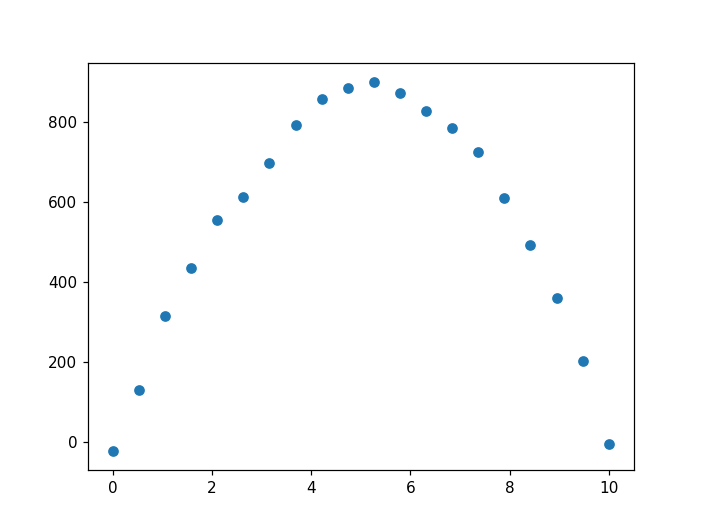

In [17]:
figure()
plot(x,y,'o')

We saw in class that the best-fitting polynomial of order $k$ to a given data set has coefficients $(a_0, a_1, \dots, a_k)$ that satisfy the matrix equation
$$
\begin{pmatrix}
N & \sum_i x_i & \sum_i x_i^2 & \dots & \sum_i x_i^k \\
\sum_i x_i & \sum_i x_i^2 & \sum_i x_i^3 & \dots & \sum_i x_i^{k+1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_i x_i^k & \sum_i x_i^{k+1} & \sum_i x_i^{k+2} & \dots & \sum_i x_i^{2k} \\
\end{pmatrix}
\begin{pmatrix} a_0 \\ a_1 \\ \vdots \\ a_k\end{pmatrix}
=
\begin{pmatrix} \sum_i y_i \\ \sum_i x_iy_i \\ \vdots \\ \sum_i x_i^k y_i\end{pmatrix}.
$$

**Write functions `coefficient_matrix(x, k)` and `constant_matrix(x, y, k)` to calculate, respectively, the square matrix on the LHS and the vector on the RHS.** Here `x` and `y` are 1D numpy `array`s of data, and as in the equation above `k` is the order of polynomial to fit to.

*Hint:* We can use the fact that mathematical operations on `array`s are evaluated elementwise to our advantage. For instance, $\sum_i x_i^2 y_i$ can be written in Python as `sum(x**2 * y)` – can you see why?

In [18]:
def coefficient_matrix(x, k):
    """Returns a square matrix of coefficients used to fit data, where:
    x are data
    k is order of polynomial to fit to"""
    M = np.zeros((k+1,k+1))
    for row in range(k+1):
        for column in range(k+1):
            M[row,column]=sum(x**(column+row))
    return M

def constant_matrix(x, y, k):
    """Returns a vector matrix of constants used to fit data, where:
    x and y are data
    k is order of polynomial to fit to"""
    v = np.zeros(k+1)
    for i in range(k+1):
        v[i] = sum(x**i * y)
    return v

To start with, let’s look for a quadratic solution, $k = 2$. **Use the `solve` function, together with the matrix functions you just defined, to find the coefficients of the best quadratic fit to these data.**

In [19]:
quadratic_coefficients = np.linalg.solve(coefficient_matrix(x,2),constant_matrix(x,y,2))

To make your life a bit easier, I’ve defined a Python function that will evaluate a polynomial with given coefficients. Check that you understand how the function below works. Using it and the coefficients you’ve just found, **plot the data together with your fit to them and the *residual* (*i.e.*, the difference between data and fit).**

In [20]:
def y_fitted(x, coefficients):
    return sum([c*x**i for i, c in enumerate(coefficients)])

In [21]:
y_f = y_fitted(x,quadratic_coefficients)

<IPython.core.display.Javascript object>


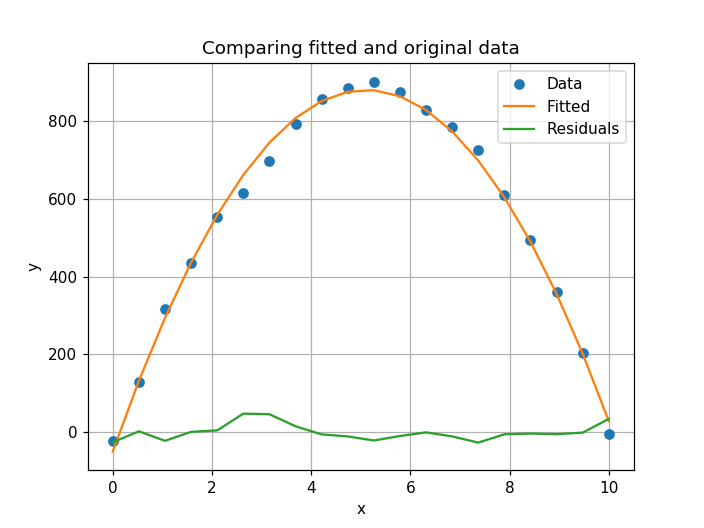

In [22]:
figure()
plot(x,y,'o',label="Data")
plot(x,y_f,label="Fitted")
plot(x,y_f-y,label="Residuals")
title("Comparing fitted and original data")
xlabel("x")
ylabel("y")
grid()
legend()

▶ **CHECKPOINT 2**

We now need some measure of how good the fit is. One such measure is the *reduced chi-squared*, which is simply the sum of the squared residuals divided by the number of *degrees of freedom* – that is, the number of parameters we have fitted:

$$
\chi^2_\text{red} = \frac{\sum_i(y_\text{fitted} - y_\text{observed})^2}{k + 1}.
$$

**Write a function `chi_squared(x, y, coefficients)` to calculate the reduced chi-squared. Evaluate this for your quadratic fit.** 

*Hint:* if you can, try to make your function independent of the number of coefficients so that you can reuse it for a fit that is not quadratic. The denominator $k+1$ is the size of `coefficients`: use `coefficients.size` or `len(coefficients)`.

In [23]:
def chi_squared(x, y, coefficients):
    """A test to measure the quality of the fit using:
    x , y the data
    calculated coefficients """
    
    y_f = y_fitted(x,coefficients)
    
    return ( sum( (y_f - y) **2)) / (coefficients.size)

In [24]:
chi_squared(x, y, quadratic_coefficients)

2872.5969514796543

**Try higher-order fits (cubic, quartic, …). How does the $\chi^2$ value change?**

▶ **CHECKPOINT 3**

In [25]:
cubic_coefficients = np.linalg.solve(coefficient_matrix(x,3),constant_matrix(x,y,3))
chi_squared(x, y, cubic_coefficients)

1045.9115539850263

In [26]:
quartic_coefficients = np.linalg.solve(coefficient_matrix(x,4),constant_matrix(x,y,4))
chi_squared(x,y,quartic_coefficients)

835.59326215517217

<IPython.core.display.Javascript object>


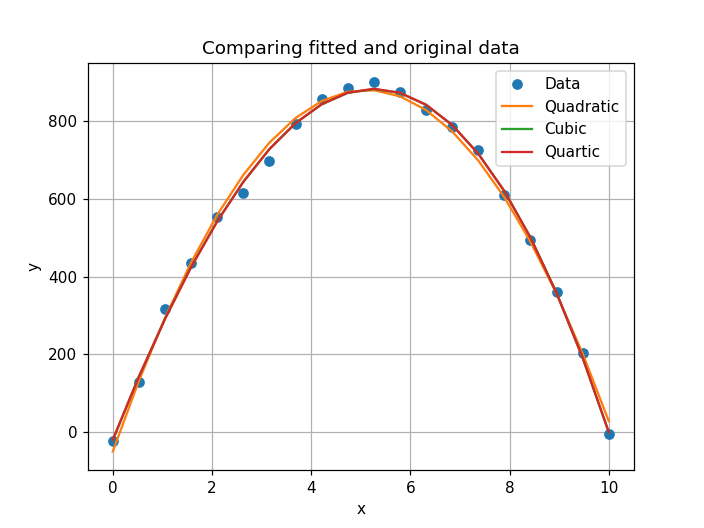

In [29]:
figure()
plot(x,y,'o',label="Data")
plot(x,y_f,label="Quadratic")
plot(x,y_fitted(x,cubic_coefficients),label="Cubic")
plot(x,y_fitted(x,quartic_coefficients),label="Quartic")
title("Comparing fitted and original data")
xlabel("x")
ylabel("y")
grid()
legend()

<IPython.core.display.Javascript object>


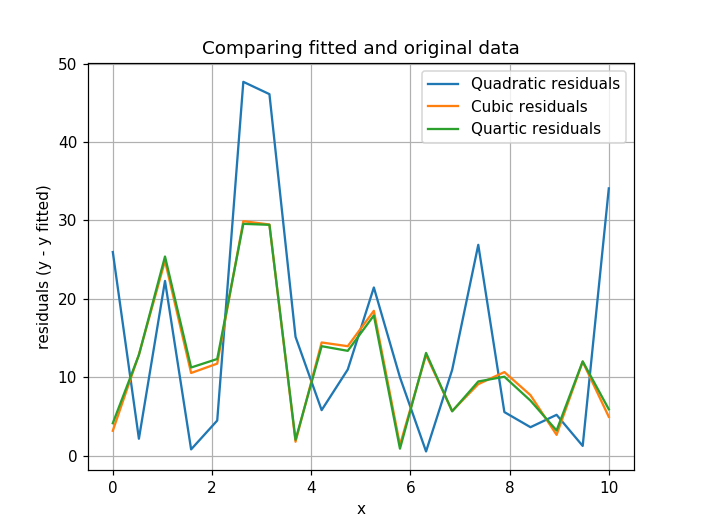

In [33]:
figure()
plot(x,abs(y-y_f),label="Quadratic residuals")
plot(x,abs(y-y_fitted(x,cubic_coefficients)),label="Cubic residuals")
plot(x,abs(y-y_fitted(x,quartic_coefficients)),label="Quartic residuals")
title("Comparing fitted and original data")
xlabel("x")
ylabel("residuals (y - y fitted)")
grid()
legend()